# Vectors & 2×2 Matrices: Determinant, Inverse, Parallelogram

---

## What is this?

This notebook shows how two 2D vectors span an area,  
how a 2×2 matrix transforms that area,  
and how the determinant and inverse reveal the transformation’s geometry.

---

## Core idea

- Two vectors `[v1, v2]` in 2D span a parallelogram.
- A 2×2 matrix `A` acts as a linear transformation that stretches, compresses, or flips that shape.
- The **determinant** measures how the area changes.
- If `det(A) = 0`, the transformation flattens the space → matrix is singular → no inverse.
- If `det(A) ≠ 0`, `A` is invertible: the transformation is reversible.

---

## What we’ll do

1. Define two 2D vectors and a 2×2 matrix `A`  
2. Visualize the original parallelogram they span  
3. Apply `A` and see the new parallelogram  
4. Compute `det(B)`, `det(A)`, `det(B_transformed)` and verify area scaling  
5. Compute the inverse `A⁻¹` if it exists  
6. Solve a sample linear system `Ax = b`  
7. Interpret how these pieces connect geometry and algebra

---

## Goal

> Understand how vectors, matrices, determinants, and inverses  
> combine to show the geometric effect of a linear transformation.


In [7]:
import numpy as np
import matplotlib.pyplot as plt


# Define original vectors
v1 = np.array([2, 1])
v2 = np.array([1, 2])

# Define transformation matrix A
A = np.array([[1, 2],
              [2, 4]])  

# Stack vectors as a matrix B
B = np.column_stack((v1, v2))

# Apply transformation
B_transformed = A @ B

# Compute determinants
det_B = np.linalg.det(B)
det_A = np.linalg.det(A)
det_B_transformed = np.linalg.det(B_transformed)

print("det(B) (original parallelogram area):", det_B)
print("det(A) (transformation scale factor):", det_A)
print("det(B_transformed) (new area):", det_B_transformed)
print("det(B_transformed) ?= det(A) * det(B):", det_B_transformed, "vs", det_A * det_B)


det(B) (original parallelogram area): 2.9999999999999996
det(A) (transformation scale factor): 0.0
det(B_transformed) (new area): 0.0
det(B_transformed) ?= det(A) * det(B): 0.0 vs 0.0


Matrix A is singular; inverse does not exist.
Cannot solve Ax = b because A is singular.


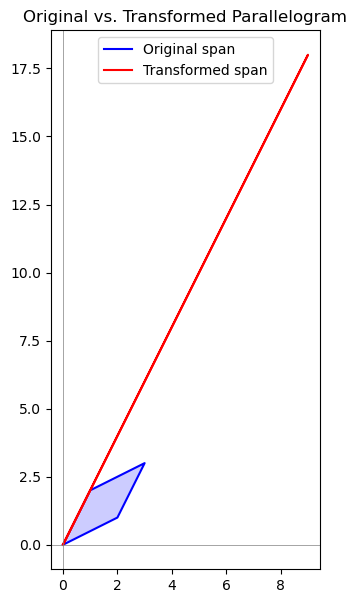

In [8]:


fig, ax = plt.subplots(figsize=(7,7))

if det_A != 0:
    A_inv = np.linalg.inv(A)
    print("Inverse of A:\n", A_inv)
else:
    print("Matrix A is singular; inverse does not exist.")

# Solve Ax = b
b = np.array([1, 1])

if det_A != 0:
    x = A_inv @ b
    # Or: x = np.linalg.solve(A, b)
    print("Solution x:", x)
    print("Check: A @ x =", A @ x, "should equal b =", b)
else:
    print("Cannot solve Ax = b because A is singular.")


# Original parallelogram
P = np.array([
    [0,0],
    v1,
    v1 + v2,
    v2,
    [0,0]
])
ax.plot(P[:,0], P[:,1], 'b-', label='Original span')
ax.fill(P[:,0], P[:,1], 'b', alpha=0.2)

# Transformed parallelogram
v1_t = B_transformed[:,0]
v2_t = B_transformed[:,1]
P_t = np.array([
    [0,0],
    v1_t,
    v1_t + v2_t,
    v2_t,
    [0,0]
])
ax.plot(P_t[:,0], P_t[:,1], 'r-', label='Transformed span')
ax.fill(P_t[:,0], P_t[:,1], 'r', alpha=0.2)

# Axes
ax.axhline(0, color='grey', lw=0.5)
ax.axvline(0, color='grey', lw=0.5)
ax.set_aspect('equal')
ax.legend()
ax.set_title('Original vs. Transformed Parallelogram')

plt.show()

## Oops! Looks like our matrix A is singular.

In [11]:
v1 = np.array([2, 1])
v2 = np.array([1, 2])

# Then, we shift matrix A
A = np.array([[2, 1],
              [1, 2]]) 

# Stack vectors as a matrix B
B = np.column_stack((v1, v2))

# Apply transformation
B_transformed = A @ B

# Compute determinants
det_B = np.linalg.det(B)
det_A = np.linalg.det(A)
det_B_transformed = np.linalg.det(B_transformed)

print("det(B) (original parallelogram area):", det_B)
print("det(A) (transformation scale factor):", det_A)
print("det(B_transformed) (new area):", det_B_transformed)
print("det(B_transformed) ?= det(A) * det(B):", det_B_transformed, "vs", det_A * det_B)

det(B) (original parallelogram area): 2.9999999999999996
det(A) (transformation scale factor): 2.9999999999999996
det(B_transformed) (new area): 8.999999999999998
det(B_transformed) ?= det(A) * det(B): 8.999999999999998 vs 8.999999999999998


Inverse of A:
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
Solution x: [0.33333333 0.33333333]
Check: A @ x = [1. 1.] should equal b = [1 1]


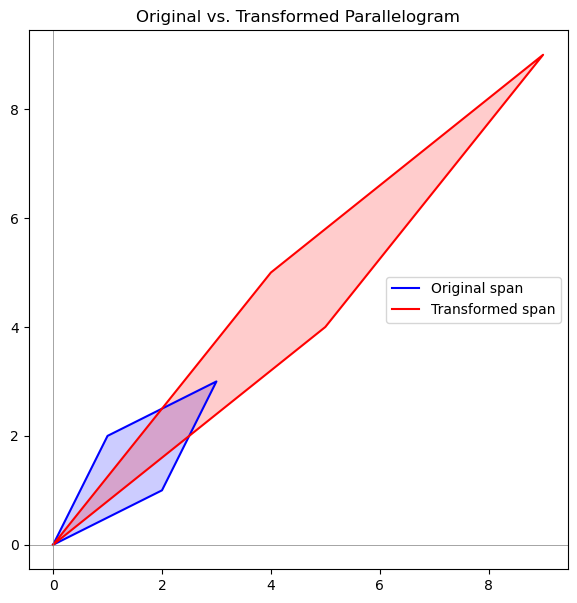

In [12]:
if det_A != 0:
    A_inv = np.linalg.inv(A)
    print("Inverse of A:\n", A_inv)
else:
    print("Matrix A is singular; inverse does not exist.")

# Solve Ax = b
b = np.array([1, 1])

if det_A != 0:
    x = A_inv @ b
    # Or: x = np.linalg.solve(A, b)
    print("Solution x:", x)
    print("Check: A @ x =", A @ x, "should equal b =", b)
else:
    print("Cannot solve Ax = b because A is singular.")



fig, ax = plt.subplots(figsize=(7,7))

# Original parallelogram
P = np.array([
    [0,0],
    v1,
    v1 + v2,
    v2,
    [0,0]
])
ax.plot(P[:,0], P[:,1], 'b-', label='Original span')
ax.fill(P[:,0], P[:,1], 'b', alpha=0.2)

# Transformed parallelogram
v1_t = B_transformed[:,0]
v2_t = B_transformed[:,1]
P_t = np.array([
    [0,0],
    v1_t,
    v1_t + v2_t,
    v2_t,
    [0,0]
])
ax.plot(P_t[:,0], P_t[:,1], 'r-', label='Transformed span')
ax.fill(P_t[:,0], P_t[:,1], 'r', alpha=0.2)

# Axes
ax.axhline(0, color='grey', lw=0.5)
ax.axvline(0, color='grey', lw=0.5)
ax.set_aspect('equal')
ax.legend()
ax.set_title('Original vs. Transformed Parallelogram')

plt.show()


## Interpretation

- **Vectors & Span:** Two vectors `[v1, v2]` span a parallelogram that represents all their linear combinations.
- **Transformation A:** Applying `A` stretches, compresses, or flips this parallelogram.
- **Determinant:** `det(A)` shows the area scaling factor:
  - `|det(A)|` > 1 means expansion.
  - `|det(A)|` < 1 means contraction.
  - Negative means flipped orientation.
  - Zero means the shape is flattened into a line → information is lost.
- **Inverse:** If `det(A) ≠ 0`, then `A` is invertible and its effect can be reversed.
- **Solving Ax = b:** Solving a linear system means finding the vector `x` that maps to `b`.  
  If `A` is invertible, `x` is unique.  
  If `A` is singular, the system is either impossible or underdetermined.

> Together, the parallelogram and determinant show how linear transformations affect shapes geometrically and why invertibility matters algebraically.
